### Train de perceptron om de Iris-dataset te classificeren

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from typing import List
import seaborn as sns,random, pandas as pd, matplotlib.pyplot as plt, sys, perceptron 
sys.path.append("/Users/marya/OneDrive/Bureaublad/ML")

C:\Users\marya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Set de random seed gelijk aan mijn studentennummer zoals het in de opdracht stond.

In [2]:
random.seed(1756450)

We maken eerst een functie aan die random getallen kan genereren.

In [3]:
def random_number(n=1):
    return [random.randrange(-10, 10) for i in range((n))]

Nu tijd om de data set te loaden en met de opdracht te beginnen! 

In [4]:
iris = load_iris()

We pakken de data en de targets van de dataset. Die gaan we verolgens verder gebruiken bij het trainen van de perceptron.

In [5]:
data, target = iris['data'], iris["target"]

De laatste stap van de voorberieding is een functie schrijven die een perceptron aanamken een updaten!

In [6]:
def test(data:List[float], target:List[float], num_weight:int)->list:
    """
    Een functie die een preceptron aanmaakt met random parameters en vervolgens update.
    :return
        List van de nieuwe predicts
    """
    perceptronn = perceptron.Perceptron(weights=random_number(num_weight), bias=random_number(), threshold=random_number())  
    print(f"perceptron voor de update {perceptronn}")
    
    for _ in range(100):
        for n in range(len(data)):
            perceptronn.update(data[n], target[n])
    print(f"perceptron na de update {perceptronn}")
    
    return [perceptronn.predict(data[i]) for i in range(len(data))]

__ii. Classificeer daarna alle drie de types, dus ook Verginica. Wat zijn de uiteindelijke parameters van de perceptron?__

In [7]:
predict = test(data, target, 4)

perceptron voor de update Perceptron: weights=[-6, -4, -5, 2], bias=[-8], output =0
perceptron na de update Perceptron: weights=[817.2199999999876, -210.4899999999953, 2052.44999999977, 894.8600000000789], bias=[-1.8], output =1


In [8]:
accuracy_score(target, predict)

0.3333333333333333

__Resulaten__

Zoals je hieronder ziet, wordt er ongeveer 33,33% goed geclassficeerd. Dat betenkt dat er alleen 1/3 van de target goed wordt voorspeeld. Dat kunnen we het beste zien in de heatmap hieronder zien. Dat de perceptron zo slecht 3 targets kan voorspellen kan komen omdat het geen lineare probleem is. Dit probeleem kan mogelijk opgelost worden met de sigmoid functie.

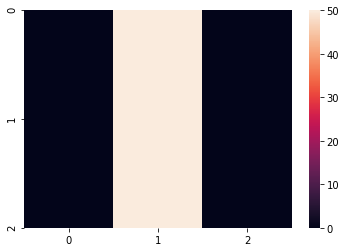

In [9]:
sns.heatmap(confusion_matrix(target, predict))

__Heeft het aantaal features hier invloed op?__

Zou de preceptron iets beter kunnen presenteren als we het predicten met alleen maar de helft van de featurers doen? 
Hier onder kiezen we voor de PetalLengthCm en PetalWidthCm als features.

In [10]:
patel_data = data[:,2:]

In [12]:
predict = test(patel_data, target, 2)

perceptron voor de update Perceptron: weights=[1, -1], bias=[-2], output =0
perceptron na de update Perceptron: weights=[2054.5599999997694, 890.6200000000789], bias=[3.3], output =1


In [13]:
accuracy_score(target, predict)

0.3333333333333333

__Resultaten__

zoals je hier boven ziet, heeft het aantaal features geen invloed op de werking van de preceptron. Het maakt dus niet uit of je alles features gebruikt of niet. Want de accuracy score blijft hetzelfde. 

____________________

__i.Classificeer eerst alleen de types Setosa en Versicolour. Wat zijn de uiteindelijke parameters van de perceptron?__


In [14]:
# We pakken alleen de data van de Setosa en Versicolour bloemen.
twee_iris = data[:100]
twee_iris_target = target[:100]

In [15]:
predict = test(twee_iris, twee_iris_target, 4)

perceptron voor de update Perceptron: weights=[0, 3, -7, -9], bias=[3], output =0
perceptron na de update Perceptron: weights=[0.42000000000000015, -1.9200000000000004, 3.6000000000000028, -4.369999999999974], bias=[1.9], output =1


In [16]:
accuracy_score(twee_iris_target, predict)

1.0

__Resultaten__

We zien dat de accuracy score 100% is. Dat betekent dat de perceptron de twee sorten bloemnen goed kan classificeren. Dat is zeker overgefit maar voor deze opdracht maakt het niet uit. 

__De andere twee soorten bloemen__


__Versicolour en Virginica__ 

In [17]:
twee_target_2 = target[50:]
twee_data = data[50:]

In [18]:
predict = test(twee_data, twee_target_2, 4)

perceptron voor de update Perceptron: weights=[6, 9, -3, -10], bias=[-5], output =0
perceptron na de update Perceptron: weights=[3300.0000000000205, 1495.9999999999202, 2773.0000000000064, 1003.0000000000191], bias=[495.], output =1


In [19]:
accuracy_score(twee_target_2, predict)

0.5

__Resultaten__

Uit de score van de accruacy van 2 soorten bloemen, zien we dat een perceptron veel meer moeite heeft met onderscheid vinden tussen deze twee soreten bloemen. Dat komt(zoals we hieronder in de grafiek konden zien) omdat deze twee soorten heel erg op elkaar lijken. 

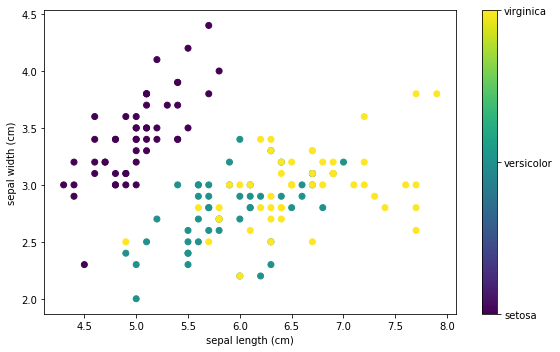

In [20]:
# Bron: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 5))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()